In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier
import optuna
import warnings
warnings.filterwarnings('ignore')

In [27]:
A = pd.read_csv('./model-A-0.79909.csv').rename(columns={'gender':'A'}).set_index('id')
B = pd.read_csv('./model-B-0.80767.csv').rename(columns={'gender':'B'}).set_index('id')
C = pd.read_csv('./model-C-0.79660.csv').rename(columns={'gender':'C'}).set_index('id')
D = pd.read_csv('./model-D-0.79967.csv').rename(columns={'gender':'D'}).set_index('id')
E = pd.read_csv('./model-E-0.80090.csv').rename(columns={'gender':'E'}).set_index('id')
F = pd.read_csv('./model-F-0.80258.csv').rename(columns={'gender':'F'}).set_index('id')
G = pd.read_csv('./model-G-0.80711.csv').rename(columns={'gender':'G'}).set_index('id')
H = pd.read_csv('./model-H-0.79549.csv').rename(columns={'gender':'H'}).set_index('id')
I = pd.read_csv('./model-I-0.80194.csv').rename(columns={'gender':'I'}).set_index('id')
J = pd.read_csv('./model-J-0.80108.csv').rename(columns={'gender':'J'}).set_index('id')
K = pd.read_csv('./model-K-0.79422.csv').rename(columns={'gender':'K'}).set_index('id')
L = pd.read_csv('./model-L-0.80711.csv').rename(columns={'gender':'L'}).set_index('id')
BFJA = pd.read_csv('./BFJA-0.81183.csv').rename(columns={'gender':'BFJA'}).set_index('id')
AK = pd.read_csv('./AK.csv').rename(columns={'gender':'AK'}).set_index('id')
AJIF = pd.read_csv('./AJIF.csv').rename(columns={'gender':'AJIF'}).set_index('id')



In [28]:
result = pd.concat([A,B,C,D,E,F,G,H,I,J,K,L],axis=1)

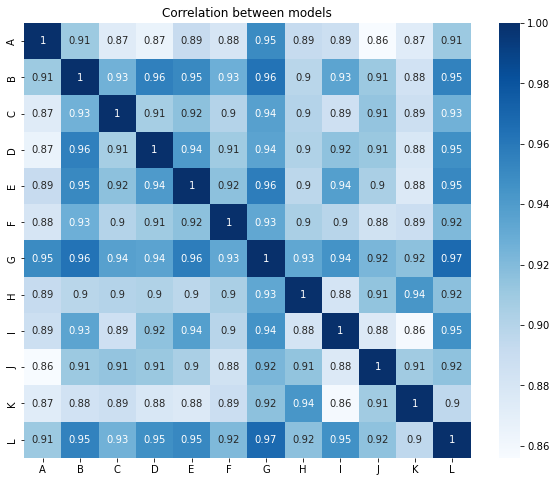

In [29]:
plt.figure(figsize = (10,8))
g = sns.heatmap(result.corr(),annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

In [32]:
corr = (result.corr().sum()-1)/(result.corr().shape[0]-1)
auc = {'A':0.79909,'B':0.80767,'C':0.79660,'D':0.79967,'E':0.80090,'F':0.80258,'G':0.80711,
       'H':0.79549,'I':0.80194,'J':0.80108,'K':0.79422,'L':0.80711}
auc = pd.Series(auc)
names = ['A','B','C','D','E','F','G','H','I','J','K','L']

In [33]:
df = pd.DataFrame({'model':names, 'auc':auc, 'cor':corr})
df

,model,auc,cor
A,A,0.79909,0.890011
B,B,0.80767,0.928649
C,C,0.79660,0.906657
D,D,0.79967,0.915196
E,E,0.80090,0.921718
F,F,0.80258,0.905770
G,G,0.80711,0.941701
H,H,0.79549,0.907525
I,I,0.80194,0.906257
J,J,0.80108,0.901721


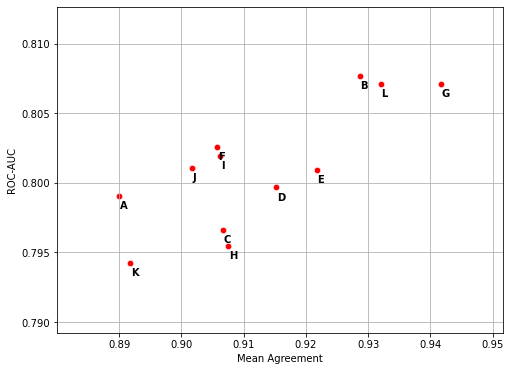

In [34]:
plt.figure(figsize=(8,6))
g = sns.scatterplot(x="cor", y="auc", data=df, s=40, color='red')
for line in range(0, df.shape[0]):
     g.text(df.cor[line]+0.0001, df.auc[line]-0.0009, 
            df.model[line], horizontalalignment='left', 
            size='medium', color='black', weight='semibold')
        
plt.xlim((df.cor.min()-0.01,df.cor.max()+0.01))
plt.ylim((df.auc.min()-0.005,df.auc.max()+0.005))
plt.xlabel('Mean Agreement')
plt.ylabel('ROC-AUC')
plt.grid()
plt.show()

In [16]:
BFIJA = pd.concat([B,F,I,J,A],axis=1)
BFIJA['gender'] = BFIJA.sum(axis=1)/5
BFIJA = BFIJA.drop(['B','F','I','J','A'],axis=1).reset_index()
#BFIJA.to_csv("BFIJA.csv", index=False)

In [17]:
AJIF = pd.concat([A,J,I,F],axis=1)
AJIF['gender'] = AJIF.sum(axis=1)/4
AJIF = AJIF.drop(['A','J','I','F'],axis=1).reset_index()
#AJIF.to_csv("AJIF.csv", index=False)

In [14]:
weighted_B = B*15.6
weighted_F = F*16.5
weighted_I = I*18.6
weighted_J = J*21.4
weighted_A = A*27.9
weighted_avg = pd.concat([weighted_B, weighted_F, weighted_I, weighted_J, weighted_A],axis=1)
weighted_avg['gender'] = weighted_avg.sum(axis=1)/100
weighted_avg = weighted_avg.drop(['B','F','I','J','A'],axis=1).reset_index()
#weighted_avg.to_csv("weighted_avg.csv", index=False)
weighted_avg

,id,gender
0,3500,0.674931
1,3501,0.246018
2,3502,0.217440
3,3503,0.336732
4,3504,0.486368
...,...,...
2477,5977,0.512869
2478,5978,0.396747
2479,5979,0.654325
2480,5980,0.398455


In [ ]:
AJIF = pd.concat([A,J,I,F],axis=1)
AJIF['gender'] = AJIF.sum(axis=1)/4
AJIF = AJIF.drop(['A','J','I','F'],axis=1).reset_index()
AJIF.to_csv("AJIF.csv", index=False)

In [37]:
DAKCI = pd.concat([D,A,K,C,I],axis=1)
DAKCI['gender'] = DAKCI.sum(axis=1)/5
DAKCI = DAKCI.drop(['D','A','K','C','I'],axis=1).reset_index()
DAKCI.to_csv("DAKCI.csv", index=False)
DAKCI

,id,gender
0,3500,0.727937
1,3501,0.219706
2,3502,0.180547
3,3503,0.261808
4,3504,0.393604
...,...,...
2477,5977,0.455438
2478,5978,0.349935
2479,5979,0.676403
2480,5980,0.407193


In [ ]:
BKAIJ = pd.concat([B,K,A,I,J],axis=1)
BKAIJ['gender'] = BKAIJ.sum(axis=1)/5
BKAIJ = BKAIJ.drop(['B','K','A','I','J'],axis=1).reset_index()
BKAIJ.to_csv("BKAIJ.csv", index=False)
BKAIJ